### Q1d

In [ ]:
import os, re, sys, IPython, pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve
from scipy import integrate

Text(0.5, 1.0, 'Change in Eigenvalues based on $S$')

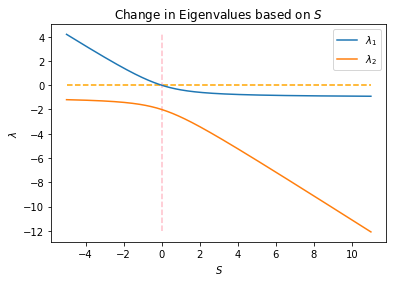

In [97]:
S = np.linspace(-5,11,1001)

e1 = (-S-2 + np.sqrt((S**2)+4))/2
e2 = (-S-2 - np.sqrt((S**2)+4))/2

plt.plot(S, e1, label='$\lambda_1$')
plt.plot(S, e2, label='$\lambda_2$')

plt.hlines(0,-5,11,color='orange',linestyles='--')
plt.vlines(0,-12,4.2,color='pink',linestyles='--')

plt.xlabel(r'$S$')
plt.ylabel(r'$\lambda$')
plt.legend()
plt.title("Change in Eigenvalues based on $S$")

### Q1e

In [3]:
import os, re, sys, IPython, pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve
from scipy import integrate

#### plot for Rp(x)-Rt(y) 

In [109]:
# Function for getting Rp, R values
def f(X, t=0, S=1):
    Rp, R = X
    return [(S*R - 2*Rp), (10 + Rp - S*R)]

In [110]:
def phaseplane_linear ( a, S=1, t_end=1, x01= [10,200], x1= np.linspace(-5,25,20), x2= np.linspace(5,35,20), filename='pp_lin.pdf'):
    # Compute eigenvalues
    w,v= np.linalg.eig(a)
    x_fp=np.array([10, 20/S+10])

    # Compute trajectories
    t= np.linspace(0,t_end,1000)
    sol1 = integrate.odeint(f, x01, t, args=(S,)) # [Rp , R]

    fig = plt.figure(figsize=(12,6))
    ax1= fig.add_subplot(1,2,1)
    ax2= fig.add_subplot(1,2,2)

    ax1.plot(t, sol1[:,1], '-', color='orange', label=r'$R$')
    ax1.plot(t, sol1[:,0], 'r-', label=r'$R_{p}$')
    ax1.plot(t, sol1[:,1]+sol1[:,0], 'b-', label=r'$R_{t}$')
    ax1.set_xlabel('time')
    ax1.set_ylabel('number')
    ax1.set_title('Trajectories')
    ax1.legend(loc='best')
    ax1.grid()
    ax1.set_xlim(t[0],t[-1])

    # Plot nullclines and fp
    # x1= np.linspace(-5,25,20)
    # x2= np.linspace(5,35,20)
    
    # Compute nullclines
    ax2.plot(x1, (10+x1)/S + x1,'r--', label="$R$ nullcline")
    ax2.plot(x1, 2*x1/S + x1,'b--', label="$R_{p}$ nullcline")
    
    # fp
    ax2.plot(x_fp[0], x_fp[1], linewidth=0, color='black', marker='o', markersize=10, markerfacecolor='white', label='fixed point')
    ax2.set_xlim(x1.min(),x1.max())
    ax2.set_ylim(x2.min(),x2.max())

    # Plot trajectories
    ax2.plot(sol1[:,0], sol1[:,1]+sol1[:,0], color='purple', label='Trajectory')
    #ax2.plot(sol1[:,0], sol1[:,1], color='purple', label='Trajectory')
    ax2.plot(sol1[0,0], sol1[0,1]+sol1[0,0], linewidth=0, color='black', marker='o', markersize=5, label='start' )
    ax2.plot(sol1[-1,0], sol1[-1,1]+sol1[-1,0], linewidth=0, color='black', marker='s', markersize=5, label='end' )

    ax2.set_xlabel(r'$R_{p}$')
    ax2.set_ylabel(r'$R_{t}$')

    # Show vector field
    X1, X2 = np.meshgrid(x1,x2)   # create grid
    # f(X, t=0, S=1)
    DX1, DX2 = f([X1, X2-X1],S=S) # compute derivs on grid # R = Rt - Rp
    DX2 = DX1+DX2          # Rt = R + Rp
    M= (np.hypot(DX1,DX2)) # normalize derivs
    M[M==0]= 1             # avoid divide by 0
    #normalize arrows
    DX1 /= M
    DX2 /= M
    ax2.quiver(X1, X2, DX1, DX2, M, pivot='mid')

    ax2.set_title('Phase Plane with Nullclines')
    ax2.legend(loc='best')
    #ax2.set_xlim(0,1.2)
    #ax2.set_ylim(0,3)
    ax2.grid()


    print('a={}'.format(a))
    print('eigenvalues are {}'.format(w))
    fig.savefig(filename,facecolor='white')

a=[[-1  1]
 [ 1 -2]]
eigenvalues are [-0.38196601 -2.61803399]


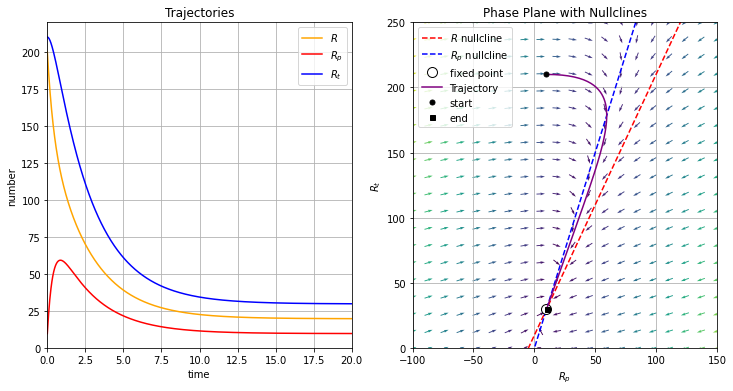

In [118]:
# Trajectory 1, starting at steady state for S=0.1
# fp(Rp,Rt)=(10,210), fp(Rp,R)=(10,200)
S = 1
a= np.array([[-S, 1],[S, -2]])
phaseplane_linear(a, S, t_end=20, x01= [10,200], x1= np.linspace(-100,150,20), x2= np.linspace(0,250,20), filename="lin_unstable.pdf")

a=[[-1  1]
 [ 1 -2]]
eigenvalues are [-0.38196601 -2.61803399]


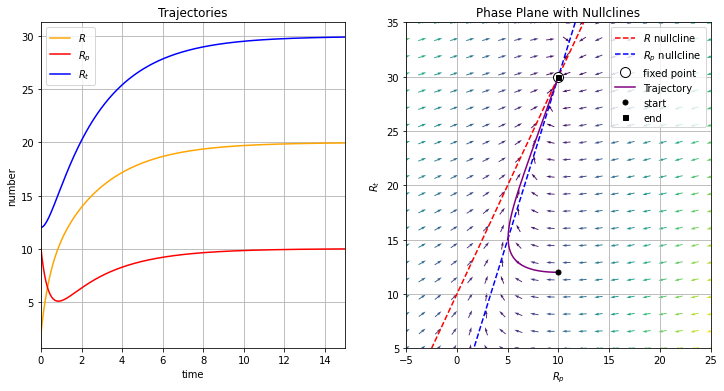

In [112]:
# Trajectory 2, starting at steady state for S=10
# fp(Rp,Rt)=(10,12), fp(Rp,R)=(10,2)
S = 1
a= np.array([[-S, 1],[S, -2]])
phaseplane_linear(a, S, t_end=15, x01= [10,2], x1= np.linspace(-5,25,20), x2= np.linspace(5,35,20), filename="lin_unstable.pdf")

### Q2a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Text(0.5, 1.0, 'Change in F based on $S$')

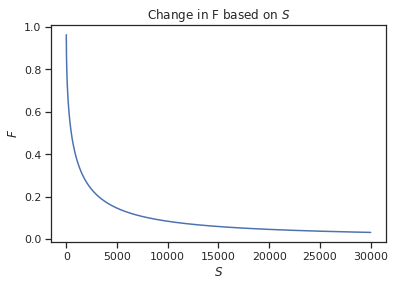

In [192]:
S = np.linspace(0,30000,30000)

K = (-100 -10*S + np.sqrt((10*S+100)**2 + 400000*S))/ (2*S)
F = (K/10 + (K**2)/100) / (1 + 2*K/10 + (K**2)/100)

plt.plot(S, F, label='$F_1$')

plt.xlabel(r'$S$')
plt.ylabel(r'$F$')
#plt.legend()
plt.title("Change in F based on $S$")

Text(0.5, 1.0, 'Change in # of scaffold-K1-K2 complexes based on $S$')

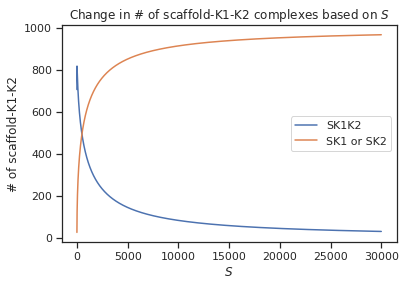

In [209]:
S = np.linspace(1,30000,30000)

K = (-100 -10*S + np.sqrt((10*S+100)**2 + 400000*S))/ (2*S)

SK1K2 = (S * K*K) / 100
SK1 = (S * K) / 10

plt.plot(S, SK1K2, label='SK1K2')
plt.plot(S, SK1, label='SK1 or SK2')

plt.xlabel(r'$S$')
plt.ylabel(r'# of scaffold-K1-K2')
plt.legend()
plt.title("Change in # of scaffold-K1-K2 complexes based on $S$")

In [204]:
max(SK1K2)

819.0024875775821

### Q3b

In [1]:
import os, re, sys, IPython, pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve
from scipy import integrate

In [5]:
X = (999 + np.sqrt(999**2 + 4*50*50) )/ (2*50)
Y = X - 20

dXdt = 50 - X - 50*X*Y
dYdt = 30 - Y - 50*X*Y
#dXYdt = 50*X*Y - XY

print(dXdt, dYdt, 50*X*Y)

4.547473508864641e-13 4.547473508864641e-13 29.97007470147267


### Q3c: Stochastic Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

In [7]:
rng= np.random.default_rng()

In [48]:
## Implemenation of the Gillespie Direct Method
# Model definition
def a_bd(x):
    X_lambda = 50
    Y_lambda = 30
    c = 50
    X_loss = 1
    Y_loss = 1
    XY_loss = 1
    return(np.array([X_lambda, X_loss*x[0], Y_lambda, Y_loss*x[1], c*x[0]*x[1], XY_loss*x[2]]))

S_bd= np.array([[1,-1,0,0,-1,0],[0,0,1,-1,-1,0],[0,0,0,0,1,-1]])
 
def run_ssa(X0,prop,S,maxsteps=1000,n_traj=10,rng=rng):
    # Arrays for storing trajectory events
    t_arr= np.zeros((n_traj,maxsteps))
    X_arr= np.zeros((n_traj,maxsteps,len(X0)))

    for n in range(n_traj):
        #0
        t=0; X=X0.copy(); a=prop(X); atot= sum(a)
        t_arr[n,0]= 0.0
        X_arr[n,0,:]= X[:]
        for i in range(1,maxsteps):
            # 1
            r1= rng.random()
            t_next= t - np.log(r1)/atot
            # 2
            r2= rng.random()
            asum=0.0
            for j in range(len(a)): # 6 reactions
                asum+= a[j]/atot
                if (asum>r2):
                    break
            j_next =j
            # 3
            t= t_next
            X+= S[:,j_next] # execute j reaction
            t_arr[n,i]= t
            X_arr[n,i,:]= X[:]
            # 4 
            a= prop(X)
            atot= sum(a)
    return(t_arr,X_arr)

In [61]:
## Sample trajectories for the birth-death model
t_arr, X_arr = run_ssa(np.array([0,0,0]), a_bd, S_bd, maxsteps=1000,n_traj=400)

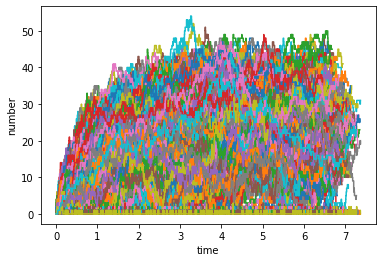

In [62]:
for n in range(len(t_arr)):
    t= t_arr[n,:]
    x= X_arr[n,:,0]
    y= X_arr[n,:,1]
    xy= X_arr[n,:,2]
    plt.step(t,x,'-',where='post')
    plt.step(t,y,'-',where='post')
    plt.step(t,xy,'-',where='post')
    #plt.legend(['X', 'Y'])
    plt.xlabel('time')
    plt.ylabel('number')
    #plt.xlim([0,10])
    #plt.ylim([0,100])

In [10]:
'''Resample time series of unevenly spaces points on new grid'''
def resample(t,y,tnew):
    snew= (len(tnew),)+ y.shape[1:]
    ynew= np.zeros(snew)
    ic=0
    for i in range(len(tnew)):
        if (t[ic]>tnew[i]):
            ynew[i]= y[max(ic-1,0)].copy()
        else:
            # find next time point in sample
            for ip in range(ic+1,len(t)):
                if (t[ip]>tnew[i]):
                    break
            ic=ip
            ynew[i]=y[ic-1].copy()
    return(tnew,ynew)

In [64]:
tre= np.linspace(0,6,1000)
Xre=np.zeros((len(t_arr),len(tre),X_arr.shape[2]) )
for n in range(len(t_arr)):
    t,xre=resample(t_arr[n,:],X_arr[n],tre)
    Xre[n,:,:]= xre

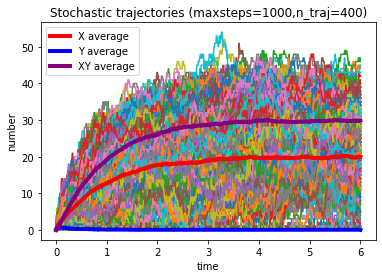

In [66]:
for n in range(0,len(Xre),1):
    plt.plot(tre, Xre[n,:])
# plt.plot(tre, np.average(Xre[:],axis=0),color='black',linewidth=4,label="average")
# plt.legend()
plt.plot(tre, np.average(Xre[:,:,0],axis=0),color='red',linewidth=4,label="X average")
plt.plot(tre, np.average(Xre[:,:,1],axis=0),color='blue',linewidth=4,label="Y average")
plt.plot(tre, np.average(Xre[:,:,2],axis=0),color='purple',linewidth=4,label="XY average")
plt.xlabel('time')
plt.ylabel('number')
plt.title('Stochastic trajectories (maxsteps=1000,n_traj=400)')
plt.legend()

In [54]:
## Calculate expected steady state value of  X  and compare with exact value
t_arr, X_arr = run_ssa(np.array([0,0,0]), a_bd, S_bd, maxsteps=10000,n_traj=20)

In [58]:
np.average(np.average(X_arr[:,1000:],axis=1),axis=0)

array([20.08217222,  0.22781667, 29.92443333])

In [184]:
## Comparison of steady state distribution with Poisson
# For steady state properties we can simulate with one long trajectory. To avoid burnin, we'll start with
t_arr, X_arr = run_ssa(np.array([20.0299253, 0.0299253, 29.97007470147267]), a_bd, S_bd, maxsteps=1000000,n_traj=1)

In [189]:
# resample
tre= np.linspace(0, t_arr[0,-1],100000)
t,xre=resample(t_arr[0,:],X_arr[0],tre)
print(np.average(X_arr, axis=1))
print(np.average(xre, axis=0)[0], np.average(xre, axis=0)[1], np.average(xre, axis=0)[2])
print(np.var(X_arr, axis=1),np.var(xre, axis=0))

[[-499735.50732437 -499841.49177937  499881.49648437]]
20.029925300028882 0.029925299999958025 29.97007470154787
[[8.33332961e+10 8.33333116e+10 8.33333069e+10]] [8.34260166e-22 1.76176372e-27 5.65508368e-21]


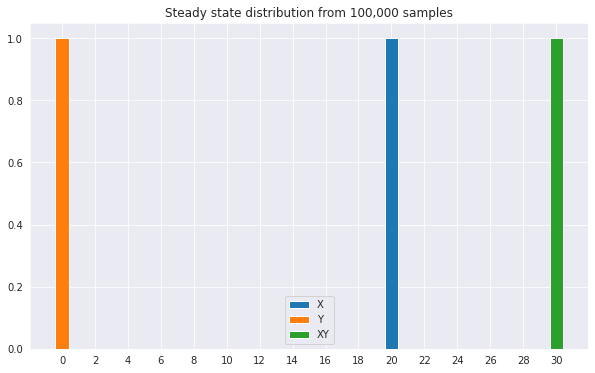

In [112]:
bins = np.arange(0, xre.max() + 1.5) - 0.5
hist_x, bins= np.histogram(xre[:,0],bins,density=True)
hist_y, bins= np.histogram(xre[:,1],bins,density=True)
hist_xy, bins= np.histogram(xre[:,2],bins,density=True)

bvals = bins[:-1] + 0.5
fig, ax = plt.subplots(figsize=(10,6))

ax.set(title='Steady state distribution from 100,000 samples')
ax.set_xticks(bins + 0.5)
ax.bar(bvals,hist_x,label=f'X')
ax.bar(bvals,hist_y,label=f'Y')
ax.bar(bvals,hist_xy,label=f'XY')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

ax.legend()

In [113]:
def f_bd(t,x):
    return(np.matmul(S_bd,a_bd(x)))

In [114]:
f_bd(0,[0,0,0])

array([50, 30,  0])

In [165]:
from scipy.integrate import solve_ivp

tmax=12
npts=1000
tint= np.linspace(0,tmax,npts)
sol = solve_ivp(f_bd,[0,tmax],[0.0,0.0,0.0],t_eval=tint)


In [192]:
## Sample trajectories for the birth-death model
t_arr, X_arr = run_ssa(np.array([0,0,0]), a_bd, S_bd, maxsteps=2000,n_traj=400)

In [193]:
tre= np.linspace(0,12,1000)
Xre=np.zeros((len(t_arr),len(tre),X_arr.shape[2]) )
for n in range(len(t_arr)):
    t,xre=resample(t_arr[n,:],X_arr[n],tre)
    Xre[n,:,:]= xre

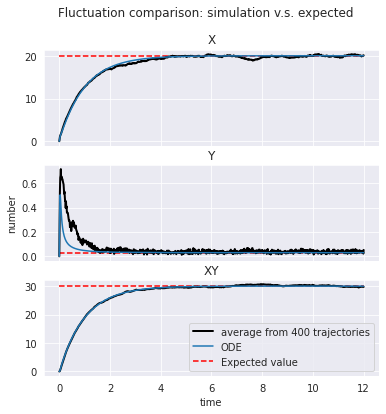

In [197]:
from IPython.core.pylabtools import figsize
lab= f'average from {len(Xre)} trajectories'

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(6,6),sharex=True)
fig.suptitle('Fluctuation comparison: simulation v.s. expected')

ax[0].plot(tre, np.average(Xre[:,:,0],axis=0),color='black',linewidth=2,label=lab)
ax[0].plot(sol.t,sol.y[0].T,label='ODE')
ax[0].set_title('X')
ax[0].hlines(20.0299253,0,12,color='red',linestyles='--')
#ax[0].legend()
#ax[0].set_xlabel('time')
#ax[0].set_ylabel('number')

ax[1].plot(tre, np.average(Xre[:,:,1],axis=0),color='black',linewidth=2,label=lab)
ax[1].plot(sol.t,sol.y[1].T,label='ODE')
ax[1].set_title('Y')
ax[1].hlines(0.0299253,0,12,color='red',linestyles='--')
#ax[1].legend()
#ax[1].set_xlabel('time')
ax[1].set_ylabel('number')

ax[2].plot(tre, np.average(Xre[:,:,2],axis=0),color='black',linewidth=2,label=lab)
ax[2].plot(sol.t,sol.y[2].T,label='ODE')
ax[2].set_title('XY')
ax[2].set_xlabel('time')
ax[2].hlines(29.97007470147267,0,12,color='red',linestyles='--', label='Expected value')
ax[2].legend()
#ax[2].set_ylabel('number')

### Q3d

In [68]:
## Implemenation of the Gillespie Direct Method
# Model definition
rng= np.random.default_rng()

def a_bd(x):
    X_lambda = 50
    Y_lambda = 30
    c = 50
    a_Xin = X_lambda
    a_Xout = x[0]
    a_Yin = Y_lambda
    a_Yout = x[1]
    a_XYin = c*x[0]*x[1]
    a_XYout = x[2]
    if x[0] < 4:
        a_Zin = 100
    else:
        a_Zin = 0
    a_Zout = x[3]

    return(np.array([a_Xin, a_Xout, a_Yin, a_Yout, a_XYin, a_XYout, a_Zin, a_Zout]))

S_bd= np.array([[1,-1,0,0,-1,0,0,0],[0,0,1,-1,-1,0,0,0],[0,0,0,0,1,-1,0,0],[0,0,0,0,0,0,1,-1]])
 
def run_ssa(X0,prop,S,maxsteps=1000,n_traj=10,rng=rng):
    # Arrays for storing trajectory events
    t_arr= np.zeros((n_traj,maxsteps))
    X_arr= np.zeros((n_traj,maxsteps,len(X0)))

    for n in range(n_traj):
        #0
        t=0; X=X0.copy(); a=prop(X); atot= sum(a)
        t_arr[n,0]= 0.0
        X_arr[n,0,:]= X[:]
        for i in range(1,maxsteps):
            # 1
            r1= rng.random()
            t_next= t - np.log(r1)/atot
            # 2
            r2= rng.random()
            asum=0.0
            for j in range(len(a)): # 6 reactions
                asum+= a[j]/atot
                if (asum>r2):
                    break
            j_next =j
            # 3
            t= t_next
            X+= S[:,j_next] # execute j reaction
            t_arr[n,i]= t
            X_arr[n,i,:]= X[:]
            # 4 
            a= prop(X)
            atot= sum(a)
    return(t_arr,X_arr)

In [98]:
## Sample trajectories for the birth-death model
t_arr, X_arr = run_ssa(np.array([0,0,0,0]), a_bd, S_bd, maxsteps=2000,n_traj=400)

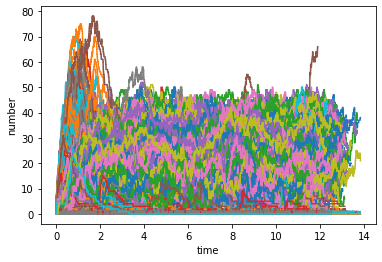

In [99]:
for n in range(len(t_arr)):
    t= t_arr[n,:]
    x= X_arr[n,:,0]
    y= X_arr[n,:,1]
    xy= X_arr[n,:,2]
    z= X_arr[n,:,3]
    plt.step(t,x,'-',where='post')
    plt.step(t,y,'-',where='post')
    plt.step(t,xy,'-',where='post')
    plt.step(t,z,'-',where='post')
    #plt.legend(['X', 'Y'])
    plt.xlabel('time')
    plt.ylabel('number')
    #plt.xlim([0,10])
    #plt.ylim([0,100])

In [103]:
tre= np.linspace(0,12,1000)
Xre=np.zeros((len(t_arr),len(tre),X_arr.shape[2]) )
for n in range(len(t_arr)):
    t,xre=resample(t_arr[n,:],X_arr[n],tre)
    Xre[n,:,:]= xre

In [104]:
np.mean(np.average(Xre[:,500:,3],axis=0))

0.7465550000000001

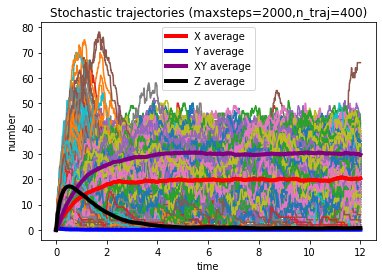

In [105]:
for n in range(0,len(Xre),1):
    plt.plot(tre, Xre[n,:])
# plt.plot(tre, np.average(Xre[:],axis=0),color='black',linewidth=4,label="average")
plt.plot(tre, np.average(Xre[:,:,0],axis=0),color='red',linewidth=4,label="X average")
plt.plot(tre, np.average(Xre[:,:,1],axis=0),color='blue',linewidth=4,label="Y average")
plt.plot(tre, np.average(Xre[:,:,2],axis=0),color='purple',linewidth=4,label="XY average")
plt.plot(tre, np.average(Xre[:,:,3],axis=0),color='black',linewidth=4,label="Z average")

plt.xlabel('time')
plt.ylabel('number')
plt.title('Stochastic trajectories (maxsteps=2000,n_traj=400)')
plt.legend(loc='best')

In [106]:
np.average(np.average(X_arr[:,500:],axis=1),axis=0)

array([19.77083167,  0.226375  , 30.11202667,  1.28540667])

In [111]:
np.average(Xre[:,500:,0])

19.86191

In [112]:
from scipy.stats import poisson

#calculate probability
poisson.cdf(k=4, mu=19.86191)

1.8950954922368243e-05

In [53]:
np.mean(xre[:,0] < 4)

0.99747

### Q3e

Text(0.5, 1.0, 'Stochastic trajectory of Z (maxsteps=1000,n_traj=1)')

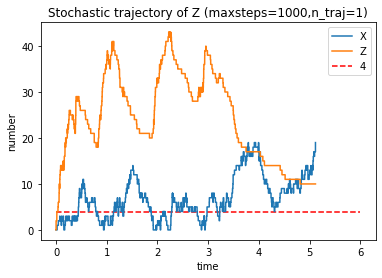

In [38]:
## Sample trajectories for the birth-death model
t_arr, X_arr = run_ssa(np.array([0,0,0,0]), a_bd, S_bd, maxsteps=1000,n_traj=1)

for n in range(len(t_arr)):
    t= t_arr[n,:]
    x= X_arr[n,:,0]
    z= X_arr[n,:,3]
    plt.step(t,x,'-',where='post', label='X')
    plt.step(t,z,'-',where='post', label='Z')
plt.xlabel('time')
plt.ylabel('number')
plt.hlines(4,0,6,color='red',linestyles='--', label='4')
plt.legend()
plt.title('Stochastic trajectory of Z (maxsteps=1000,n_traj=1)')

### Q3f

In [152]:
t_arr, X_arr = run_ssa(np.array([0,0,0,0]), a_bd, S_bd, maxsteps=1000000,n_traj=1)

In [153]:
# resample
tre= np.linspace(0, t_arr[0,-1],1000000)
t,xre=resample(t_arr[0,:],X_arr[0],tre)

Text(0.5, 1.0, 'Stochastic trajectory of Z (maxsteps=1000,000,n_traj=1)')

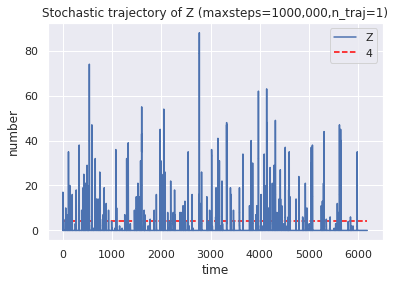

In [155]:
#t= t[0,:]
z= xre[:,3]
plt.step(t,z,'-',where='post', label='Z')
plt.xlabel('time')
plt.ylabel('number')
plt.hlines(4,min(t),max(t),color='red',linestyles='--', label='4')
plt.legend()
plt.title('Stochastic trajectory of Z (maxsteps=1000,000,n_traj=1)')

In [175]:
phenotype_h = 'A'
lifetime_h = 0
lifetime = {'A':[], 'B':[]}

for i in range(len(t)):
    Z_i = xre[i,3]
    if Z_i > 4:
        phenotype = 'B'
    else:
        phenotype = 'A'
    if phenotype == phenotype_h:
        lifetime_h += 1
    else:
        lifetime[phenotype_h].append(lifetime_h)
        lifetime_h = 1
    phenotype_h = phenotype

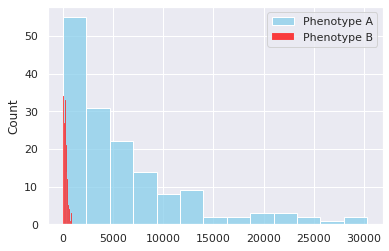

In [176]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(lifetime['A'],color="skyblue", label="Phenotype A")
sns.histplot(lifetime['B'],color="red", label="Phenotype B")

plt.legend() 
plt.show()

Text(0, 0.5, 'Count')

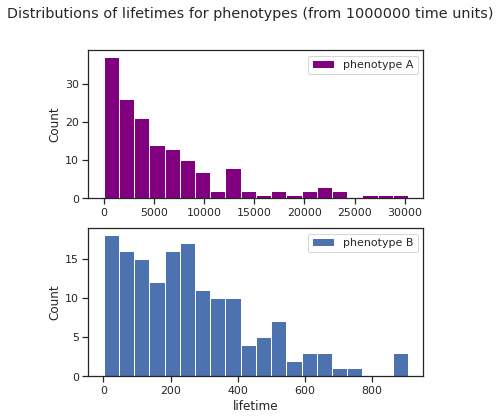

In [177]:
from IPython.core.pylabtools import figsize
sns.set(style="ticks")

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(6,6),sharex=False)
fig.suptitle('Distributions of lifetimes for phenotypes (from 1000000 time units)')

ax[0].hist(lifetime['A'], bins = 20, label='phenotype A', color='purple')
ax[0].legend()
ax[0].set_ylabel('Count')

ax[1].hist(lifetime['B'], bins = 20, label='phenotype B') # 
ax[1].legend()
ax[1].set_xlabel('lifetime')
ax[1].set_ylabel('Count')

In [179]:
print(np.mean(lifetime['A']), np.var(lifetime['A']))
print(np.mean(lifetime['B']), np.var(lifetime['B']))


6022.357142857143 39748484.8010204
259.46753246753246 38444.00219261258
